In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy.linalg import inv

(100, 1)


Text(0, 0.5, 'Weight')

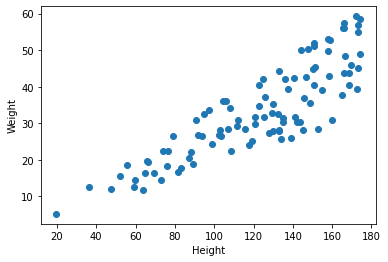

In [61]:

N = 100
std = 10
def BMI(height,weight):
    BMI = weight / (height/100)
    if BMI <= 18.4:
        return -1
    elif BMI <= 24.9:
        return 1
    elif BMI <= 29.9:
        return 1
    elif BMI <= 34.9:
        return 1
    elif BMI <= 39.9:
        return -1
    else:
        return -1
def generate_data(N):
    X = []
    Y = []
    n=0
    while n != N:
    #for i in range(N):
        x = np.random.uniform(1, 175)
        y = 4 * np.random.uniform(1, 175)
        
        if BMI(x,y) == 1:
            X.append(x)
            Y.append(y)
            n+=1

    X = np.array(X)
    Y = np.array(Y)

    X = X.reshape(N,1)
    Y = Y.reshape(N,1)
    return X,Y
    
X_train,Y_train = generate_data(100)
print(np.shape(X_train))
plt.scatter(X_train,Y_train)
plt.xlabel('Height')
plt.ylabel('Weight')

[0.36422728 0.63324243 0.37997351]


Text(0, 0.5, 'Weight')

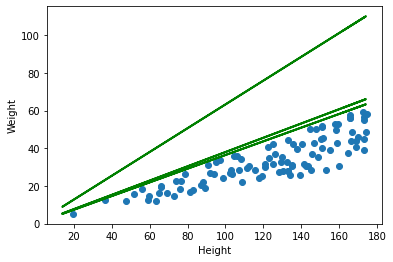

In [62]:
M = np.random.uniform(0.3, 0.9, 3)
print(M)
plt.scatter(X_train,Y_train)
for m in M:
    y_pred = np.matmul(X, [m])    
    plt.plot(X, y_pred, c='green', lw=2)
plt.xlabel('Height')
plt.ylabel('Weight')

In [63]:
class AdalineRegressor:
    def __init__(self):
        pass
    
    
    def fit(self, X_train, Y_train):
        self.w = np.matmul(inv(np.matmul(X_train.T,X_train)), np.matmul(X_train.T, Y_train))
    
    
    def predict(self, X_test):
        Y_pred = np.matmul(X_test, self.w)
        
        return Y_pred
    
    
    def evaluate(self, X_test, Y_test):
        Y_pred = np.matmul(X_test, self.w)
        sub = np.abs(X_test - Y_test)
        avg = np.mean(sub)
        
        print(avg)

In [64]:
model = AdalineRegressor()
model.fit(X_train,Y_train)
print(model.w)

[[0.27428436]]


In [65]:
Y_pred = np.matmul(X_train, model.w)

Text(0, 0.5, 'Weight')

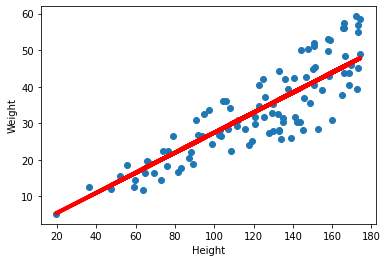

In [66]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, Y_pred, c='red', lw=4)
plt.xlabel('Height')
plt.ylabel('Weight')

In [67]:
x_test = np.array([170])
y_pred = model.predict(x_test)
print(y_pred)

[46.62834176]


In [68]:
X_test , Y_test = generate_data(100)

In [69]:
model.evaluate(X_test,Y_test)

91.64020876815624


Text(0.5, 1.0, 'scipy')

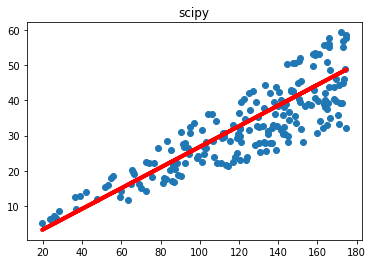

In [70]:
from scipy import stats, optimize, interpolate
X = np.concatenate((X_train, X_test))
Y = np.concatenate((Y_train, Y_test))

result = stats.linregress(X_train[:,0], Y_train[:,0])
Y_pred = result.intercept + np.matmul(X, np.array([result.slope]))
plt.scatter(X, Y)
plt.plot(X, Y_pred, c='red', lw = 4)
plt.title('scipy')